# Лабораторная работа №1. Регрессия

# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Пермяков Г.А.         | 307    | data-scientist | EDA + класс гб       |
| Ивченко М. С.        | 307    | data-scientist | feature tuning + класс регрессии       |
| Крушинин Н. Г.         | 307    | data-scientist | обучение + класс рандофорест       |

 Датасет: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## Описание датасета
Этот датасет содержит информацию о жилых районах Калифорнии: их географическое расположение, возраст застройки, характеристики домов, численность населения и домохозяйств, уровень доходов жителей, а также медианную стоимость жилья. Дополнительно учитывается близость района к океану.

Основное назначение датасета — изучение факторов, влияющих на стоимость недвижимости, и построение моделей для её предсказания.

---
### **признаки (features)**:

1. **longitude** — долгота: мера того, насколько дом расположен на запад;  
   чем больше значение, тем дальше на запад.

2. **latitude** — широта: мера того, насколько дом расположен на север;  
   чем больше значение, тем дальше на север.

3. **housingMedianAge** — медианный возраст дома в пределах квартала;  
   меньшее значение означает более новые постройки.

4. **totalRooms** — общее количество комнат в пределах квартала.

5. **totalBedrooms** — общее количество спален в пределах квартала.

6. **population** — общее количество жителей в пределах квартала.

7. **households** — общее количество домохозяйств  
   (групп людей, проживающих в одной жилой единице) в пределах квартала.

8. **medianIncome** — медианный доход домохозяйств в пределах квартала  
   (измеряется в десятках тысяч долларов США).

9. **medianHouseValue** — медианная стоимость домов для домохозяйств  
   в пределах квартала (измеряется в долларах США).

10. **oceanProximity** — расположение дома по отношению к океану/морю.

# 0. Глобавльная настройка

In [1]:
RND_SEED = 42

# ! Подготовка данных 

In [ ]:
# Install dependencies as needed:
!pip install -qqq kagglehub folium matplotlib pandas scikit-learn seaborn

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "housing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "camnugent/california-housing-prices",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/Users/germanpermakov/Documents/ВУЗ/Leetcode/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fk/yyfw6n0979bcrmxy04nz9v6r0000gn/T/ipykernel_37133/1628546408.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


посмотрим первые 5 строк датасета `df.head(n: int = 5)`


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.2 Сбор основной информации о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Проверка наличия пропусков

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

В датасете есть пропуски в столбце totalBedrooms.

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Выводы на основе датасета housing.csv:
1.	Общая информация
	-	Размер датасета: 20 640 наблюдений, 10 признаков.
	-	Целевая переменная (median_house_value): среднее ≈ 206 856 $.
→ Это данные по стоимости жилья в Калифорнии, пригодные для обучения моделей регрессии.
2.	География
	-	longitude: среднее ≈ –119.57 (Калифорния).
	-	latitude: среднее ≈ 35.63 (также соответствует географии штата).
→ Координаты корректные, выбросов в описательной статистике не видно.
3.	Возраст домов (housing_median_age)
	-	Среднее ≈ 28.6 лет, дома в среднем довольно «зрелые».
	-	Максимум (из других источников) ограничен 52 → скорее всего, искусственный потолок в данных.
4.	Жилой фонд
	-	total_rooms: среднее ≈ 2636, очень широкий разброс (от единиц до десятков тысяч).
	-	total_bedrooms: среднее ≈ 538, при этом пропущены 207 значений → потребуется обработка (imputation).
	-	Отношение спален к комнатам в среднем ≈ 20%, что выглядит правдоподобно.
5.	Население и домохозяйства
	-	population: среднее ≈ 1425 человек на квартал.
	-	households: среднее ≈ 500 домохозяйств.
	-	В среднем ≈ 2,8 человека на одно домохозяйство → реалистично.
6.	Доходы
	-	median_income: среднее ≈ 3.87 (единица = 10 000 $, то есть доход ≈ 38 700 $).
	-	Диапазон: от 0.5 (≈ 5000 $) до 15+ (≈ 150 000 $).
	-	Это один из самых сильных предикторов стоимости жилья.
7.	Стоимость жилья
	-	median_house_value:
	-	Среднее ≈ 206 856 $.
	-	Известное ограничение сверху: 500 001 $ → ценовые «потолки» могут искажать анализ.
→ Распределение цен скошено вправо, преобладает жильё среднего класса, дорогих домов меньше.
8.	Близость к океану (ocean_proximity)
	-	5 категорий, наиболее частая — <1H OCEAN (9136 объектов).
	-	→ Близость к океану является важным фактором, влияющим на стоимость (дома у океана дороже).

---

#### 🔑 Главные выводы

- 📊 Датасет достаточно большой (**20k строк**) и содержит как числовые, так и категориальные признаки.  

- ⚠️ Есть **пропуски** (в `total_bedrooms`) и **искусственные ограничения**  
  (например, цена жилья сверху ограничена **500 001 $**).  

- 🧩 Ключевые предикторы:  
  - `median_income`  
  - `ocean_proximity`  
  - соотношение **комнат/домохозяйств**  
  - возраст зданий  

- 🛠 Перед построением модели необходимы:  
  - очистка данных  
  - обработка выбросов  
  - нормализация  
  - кодирование категориального признака  

посмотрим на распределение целевой переменной

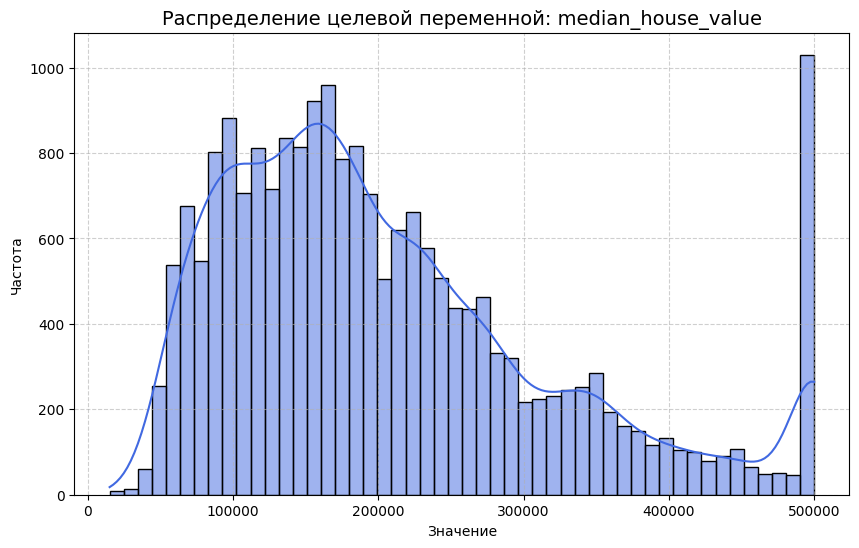

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(df, target_col="median_house_value", bins=50):
    """
    Строит гистограмму распределения целевой переменной.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Датасет с данными
    target_col : str
        Название целевой переменной (по умолчанию 'median_house_value')
    bins : int
        Количество корзин для гистограммы
    """
    plt.figure(figsize=(10,6))
    sns.histplot(df[target_col], bins=bins, kde=True, color="royalblue")
    
    plt.title(f"Распределение целевой переменной: {target_col}", fontsize=14)
    plt.xlabel("Значение")
    plt.ylabel("Частота")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

plot_target_distribution(df, target_col="median_house_value")

**вывод:** распределение целевой переменной скошено вправо, преобладает жильё среднего класса, дорогих домов меньше.

Проверим распределение оставшихся признаков

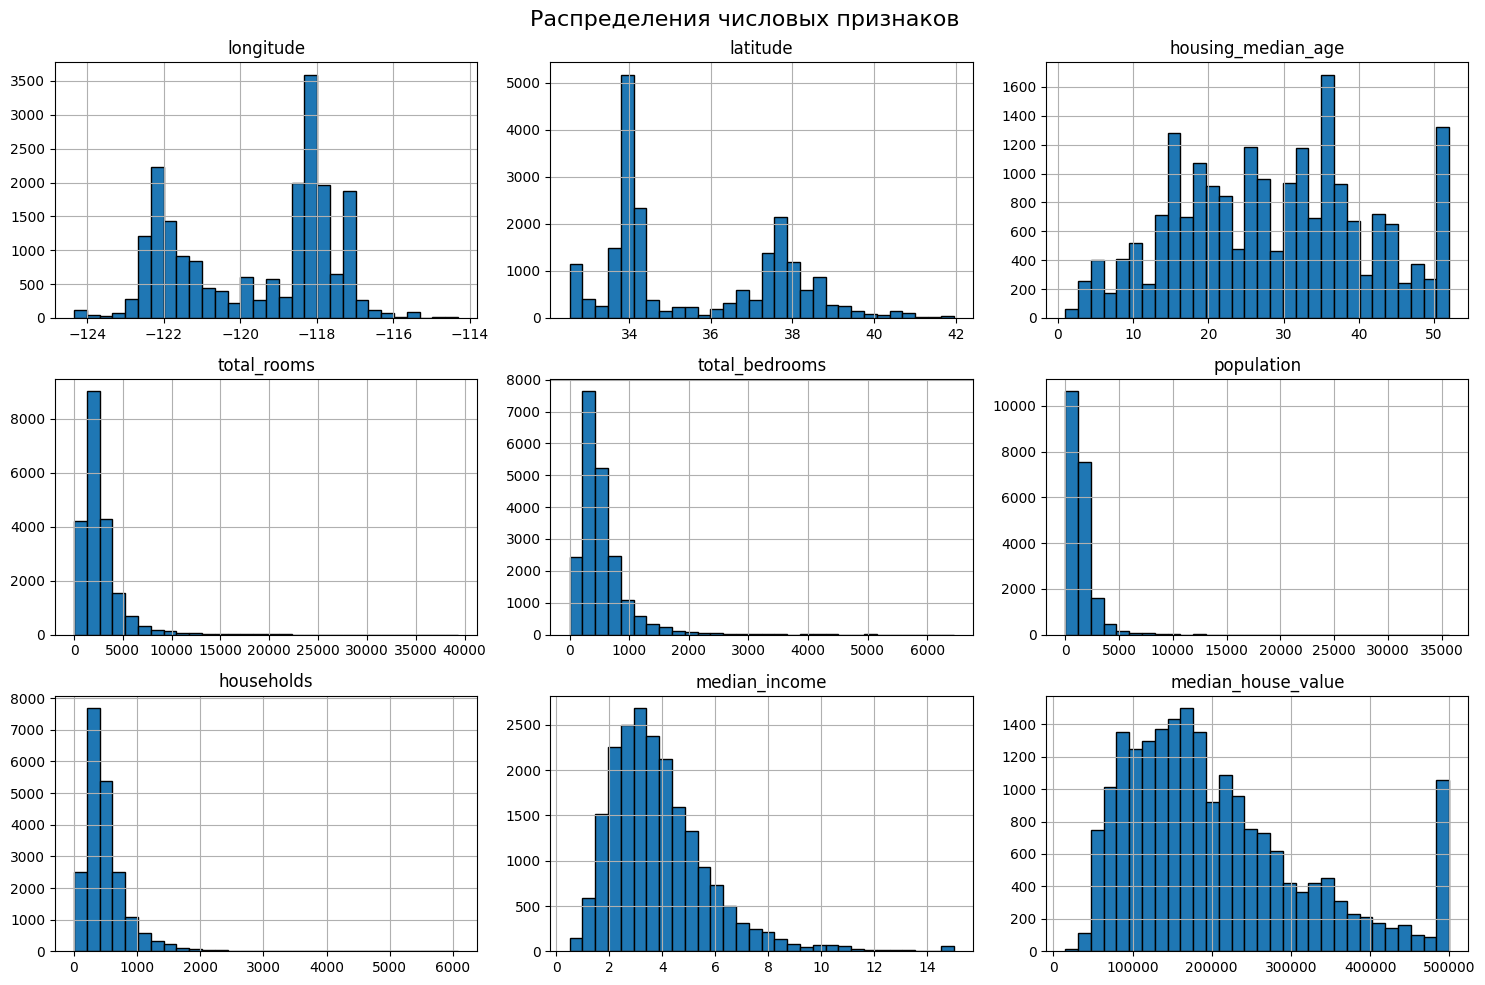

In [8]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

построим карту с помощью folium где будут отображены участки с разным уровнем медианной стоимости жилья

In [12]:

import folium
import numpy as np
import pandas as pd


# 1) Рёбра бинов: 20 ячеек = 21 граница
lat_edges = np.linspace(df["latitude"].min(),  df["latitude"].max(),  101)
lon_edges = np.linspace(df["longitude"].min(), df["longitude"].max(), 101)

# 2) Бинируем координаты в индексы 0..19
df["lat_bin"] = pd.cut(df["latitude"],  bins=lat_edges, labels=False, include_lowest=True)
df["lon_bin"] = pd.cut(df["longitude"], bins=lon_edges, labels=False, include_lowest=True)

# выкинем строки, где не попали в бин (NaN)
df2 = df.dropna(subset=["lat_bin", "lon_bin"]).copy()
df2["lat_bin"] = df2["lat_bin"].astype(int)
df2["lon_bin"] = df2["lon_bin"].astype(int)

# 3) Агрегация по ячейкам
grid = (df2.groupby(["lat_bin", "lon_bin"])["median_house_value"]
          .median()
          .reset_index())

# 4) Цветовая функция (зелёный -> красный)
min_val, max_val = df2["median_house_value"].min(), df2["median_house_value"].max()
def value_to_color(v):
    r = int(255 * (v - min_val) / (max_val - min_val))
    g = 255 - r
    return f'#{r:02x}{g:02x}00'

# 5) Карта и прямоугольники
m = folium.Map(location=[df2["latitude"].mean(), df2["longitude"].mean()], zoom_start=6)

for lat_bin, lon_bin, med in grid.itertuples(index=False):
    lat0 = lat_edges[lat_bin]
    lat1 = lat_edges[lat_bin + 1]
    lon0 = lon_edges[lon_bin]
    lon1 = lon_edges[lon_bin + 1]

    folium.Rectangle(
        bounds=[[lat0, lon0], [lat1, lon1]],
        fill=True, fill_opacity=0.6, color=None,
        fill_color=value_to_color(med),
        popup=f"Median: {med:.0f}"
    ).add_to(m)

m


Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

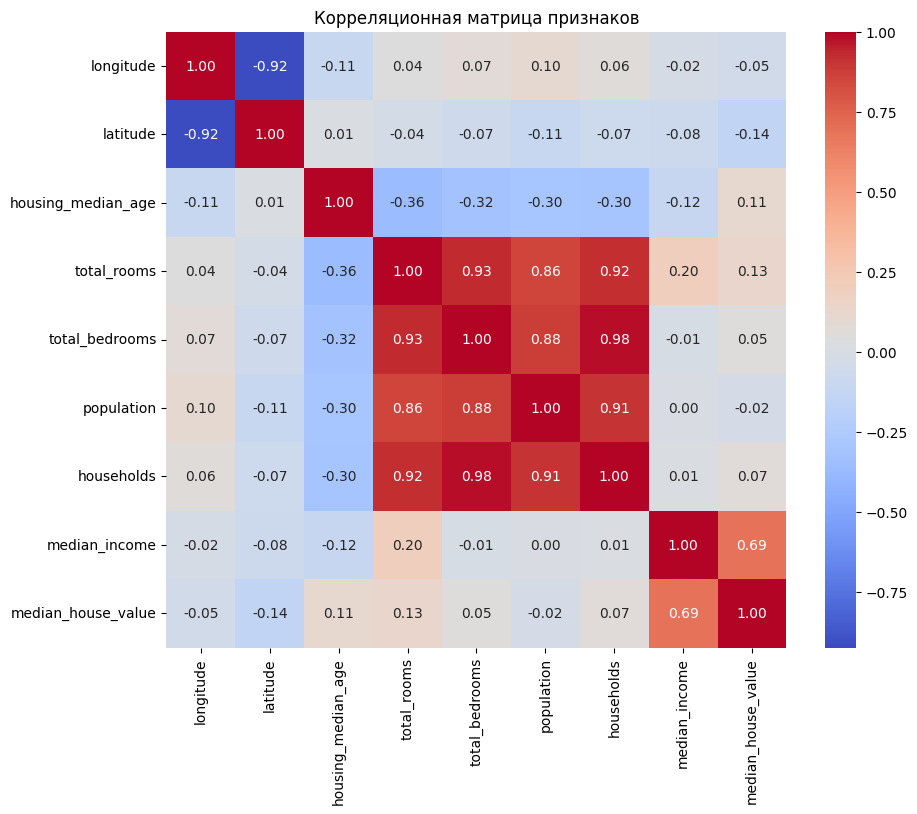

In [9]:
def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

    
df_numeric = df.drop(columns=["ocean_proximity"])
draw_corr_matrix(df_numeric)

## 📊 1.3. Подготовка датасета под разные модели (housing)

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                                   |
| ----------------------- | --------------- | ------------------- | ---------------- | ----------------------------------------------------------------- |
| **Линейная регрессия**  | Да              | Да                  | Да               | Логарифмирование `median_house_value`, полиномы по `median_income`, отношения (`rooms_per_household`, `bedrooms_per_room`, `population_per_household`) |
| **Random Forest**       | Нет             | Нет                 | Нет              | Соотношения (rooms/households), бинаризация `ocean_proximity`     |
| **XGBoost**             | Нет             | Нет                 | Нет              | Соотношения, логарифмирование целевой переменной (опционально), интеракции доход × возраст зданий |

---

## ✅ TODO для второго человека (Feature Engineering)

1. **Пропуски и выбросы**
   - Заполнить пропуски в `total_bedrooms` (медианой или предсказанием).
   - Проверить выбросы в `median_income` и `housing_median_age`, скорректировать при необходимости.

2. **Создание новых признаков**
   - `rooms_per_household = total_rooms / households`
   - `bedrooms_per_room = total_bedrooms / total_rooms`
   - `population_per_household = population / households`

3. **Географические фичи**
   - Закодировать `ocean_proximity` через One-Hot Encoding.
   - Опционально: добавить бинарный признак «близость к побережью» для категорий `<1H OCEAN` и `NEAR BAY`.

4. **Преобразования целевой переменной**
   - Логарифмировать `median_house_value` для моделей, чувствительных к скошенности (линейная регрессия).
   - Сохранить и версию без логарифма для деревьев и бустингов.
   - Опционально: попробовать квантили взять.

5. **Нормализация**
   - Масштабировать числовые признаки (StandardScaler / MinMaxScaler) — **только для линейной регрессии**.
   - Для деревьев и бустингов масштабирование не требуется.

# Написание класса GradientBoostingRegressor
